# Smart Cab
----
In this computer assignment, we will use reinforcement learning to train a self-driving cab which will
pick up and drop passengers at designated areas. We will use Q-learning algorithm.

# Environment: Taxi-v2
----
In this assignment, we will use the Taxi-v2 environment by OpenAI Gym which looks something like this:

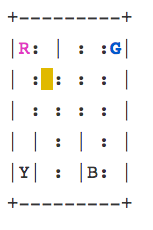

In [5]:
from __future__ import division
from __future__ import print_function

from IPython.display import display
from PIL import Image

path="taxi.png"
display(Image.open(path))

The solid rectangle represents the taxi, which is yellow without a passenger and green with a passenger.
The pipe ("|") represents a wall which cannot be crossed.
R, G, Y, B are the possible pickup and destination locations. 
The blue letter represents the current passenger pick-up location. 
The purple letter is the current destination.


# How many states? Actions?

In [6]:
import gym

env = gym.make("Taxi-v2").env
Nstates = env.observation_space.n
Nactions = env.action_space.n
print("The number of states in taxi environment is", Nstates)
print("The number of actions in taxi environment is", Nactions)

The number of states in taxi environment is 500
The number of actions in taxi environment is 6


The actions are encoded as: 0 = south, 1 = north, 2 = east, 3 = west, 4 = pickup, 5 = dropoff.
The state is a tuple of taxi row position, taxi column position, passenger location and destination location.

# Training

In [7]:
import numpy as np
import random

q = np.zeros([Nstates, Nactions])

alpha = 0.1
gamma = 0.99
epsilon = 0.1



Nepisodes = 100000
for i in range(Nepisodes):
    if i % 100 == 0:
        print("-------------------")
        print("Running episode", i)
        
    state = env.reset()

    
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Exploration
        else:
            action = np.argmax(q[state]) # Exploitation

        next_state, reward, done, info = env.step(action) 
        
        ########################## Your code here ##########################
        # you need to update the q function here
        
        old_value = q[state, action]
        next_max = np.max(q[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q[state, action] = new_value
        
        
        
        
        
        
        
        ########################## End of your code ########################
        
        state = next_state

-------------------
Running episode 0
-------------------
Running episode 100
-------------------
Running episode 200
-------------------
Running episode 300
-------------------
Running episode 400
-------------------
Running episode 500
-------------------
Running episode 600
-------------------
Running episode 700
-------------------
Running episode 800
-------------------
Running episode 900
-------------------
Running episode 1000
-------------------
Running episode 1100
-------------------
Running episode 1200
-------------------
Running episode 1300
-------------------
Running episode 1400
-------------------
Running episode 1500
-------------------
Running episode 1600
-------------------
Running episode 1700
-------------------
Running episode 1800
-------------------
Running episode 1900
-------------------
Running episode 2000
-------------------
Running episode 2100
-------------------
Running episode 2200
-------------------
Running episode 2300
-------------------
Running 

# Evaluation
After our Q-values have converged, lets use that to see how good it is. But before that, lets just fix the taxi position, pick up and destination.

In [8]:
testenv = gym.make('Taxi-v2')
testenv = testenv.unwrapped
state = testenv.encode(2, 2, 2, 1) # initializing (row, column, pickup, dropoff)
testenv.s = state

testenv.render()

penalties = 0
done = False
total_reward = 0
total_steps = 0 
while not done:
    
    ########################## Your code here ##########################
    # You need to write how action is being chosen in the evaluation.
    # Remember to call your action "a", because it is used in the next line.
    
    
    
    a = np.argmax(q[state])
    ########################## End of your code ########################
    next_s, reward, done, _ = testenv.step(a) # "a" is the action
    
    total_reward += reward
    total_steps += 1
    if reward == -10: # if hitting the wall
        penalties += 1
    
    testenv.render()
    state = next_s
    
    
print("Passenger dropped off successfully in after time steps ", total_steps)
print("Total reward is ", total_reward)
print("Penalties incurred", penalties)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : :_: : |
| : : : : |
| | : | : |
|Y| : |B: |